Bạn đã nêu ra một số điểm rất quan trọng và hợp lý về sự khác biệt giữa mạng Siamese và Triplet trong các ứng dụng như nhận diện khuôn mặt. Dưới đây là giải thích chi tiết hơn về từng khía cạnh:

### 1. Sự khác biệt giữa Face Verification và Face Recognition

- **Face Verification (Xác thực khuôn mặt)**:
  - **Mục đích**: Xác định liệu hai ảnh khuôn mặt có thuộc cùng một người hay không.
  - **Mạng sử dụng**: Mạng Siamese thường được sử dụng trong các bài toán xác thực khuôn mặt.
  - **Phương pháp**: Mạng Siamese nhận vào cặp ảnh (Anchor và Positive/Negative) và học để biểu diễn chúng trong không gian vector sao cho khoảng cách giữa các ảnh của cùng một người là nhỏ và khoảng cách giữa các ảnh của những người khác nhau là lớn.

- **Face Recognition (Nhận diện khuôn mặt)**:
  - **Mục đích**: Nhận diện danh tính của một khuôn mặt từ một tập hợp các khuôn mặt đã biết.
  - **Mạng sử dụng**: Mạng Triplet thường được sử dụng trong các bài toán nhận diện khuôn mặt.
  - **Phương pháp**: Mạng Triplet nhận vào ba ảnh (Anchor, Positive, và Negative) và học để biểu diễn chúng trong không gian vector sao cho khoảng cách giữa Anchor và Positive nhỏ hơn khoảng cách giữa Anchor và Negative một cách rõ rệt.

### 2. Hoạt động của Mạng Triplet

Mạng Triplet bao gồm ba nhánh (sub-networks) chia sẻ trọng số để xử lý ba ảnh đầu vào: Anchor, Positive và Negative. Các bước cơ bản trong quá trình huấn luyện mạng Triplet như sau:

1. **Biểu diễn vector**:
   - Mỗi ảnh đầu vào (Anchor, Positive, Negative) được đưa qua cùng một mạng con để tạo ra các biểu diễn vector tương ứng.

2. **Tính toán khoảng cách**:
   - Tính toán khoảng cách giữa Anchor và Positive (\(d(A, P)\)) và khoảng cách giữa Anchor và Negative (\(d(A, N)\)).

3. **Hàm mất mát triplet loss**:
   - Sử dụng hàm mất mát triplet loss để cập nhật trọng số của mạng. Hàm mất mát này cố gắng tối thiểu hóa khoảng cách giữa Anchor và Positive và tối đa hóa khoảng cách giữa Anchor và Negative.

### 3. Loss của Mạng Siamese hỗ trợ việc đo khoảng cách

Mạng Siamese thường sử dụng hàm mất mát contrastive loss để học các đặc trưng sao cho các biểu diễn vector của các ảnh cùng loại gần nhau và các biểu diễn vector của các ảnh khác loại xa nhau. Điều này hỗ trợ cho việc đo khoảng cách giữa các vector embedding.

#### Hàm mất mát contrastive loss:

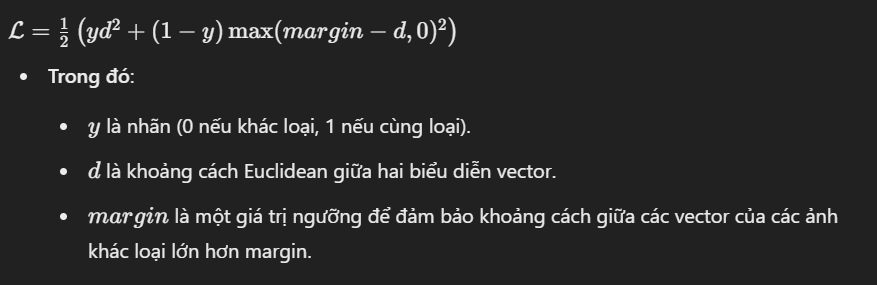

### Kết luận

- **Face Verification** sử dụng mạng Siamese với contrastive loss để học cách so sánh hai khuôn mặt và xác định xem chúng có thuộc về cùng một người hay không.
- **Face Recognition** sử dụng mạng Triplet với triplet loss để học cách nhận diện danh tính của một khuôn mặt từ một tập hợp các khuôn mặt đã biết, bằng cách đảm bảo rằng khoảng cách giữa các vector embedding của các ảnh cùng loại nhỏ hơn khoảng cách giữa các vector embedding của các ảnh khác loại.

### Ví dụ minh họa Mạng Triplet

Dưới đây là một ví dụ minh họa về việc triển khai mạng Triplet trong Keras:

```python
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def build_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    return Model(input, x)

def triplet_loss(y_true, y_pred, alpha=0.2):
    total_length = y_pred.shape.as_list()[-1]
    anchor = y_pred[:, 0:int(total_length/3)]
    positive = y_pred[:, int(total_length/3):int(2*total_length/3)]
    negative = y_pred[:, int(2*total_length/3):]
    pos_dist = K.sum(K.square(anchor - positive), axis=1)
    neg_dist = K.sum(K.square(anchor - negative), axis=1)
    basic_loss = pos_dist - neg_dist + alpha
    loss = K.maximum(basic_loss, 0.0)
    return loss

input_shape = (105, 105, 1)
base_network = build_base_network(input_shape)

input_anchor = Input(shape=input_shape)
input_positive = Input(shape=input_shape)
input_negative = Input(shape=input_shape)

processed_anchor = base_network(input_anchor)
processed_positive = base_network(input_positive)
processed_negative = base_network(input_negative)

merged_vector = tf.keras.layers.concatenate([processed_anchor, processed_positive, processed_negative], axis=1)

model = Model([input_anchor, input_positive, input_negative], merged_vector)
model.compile(loss=triplet_loss, optimizer='adam')
```

Cấu trúc này giúp mạng Triplet học các biểu diễn vector sao cho khoảng cách giữa các ảnh của cùng một người nhỏ hơn khoảng cách giữa các ảnh của những người khác nhau, hỗ trợ cho việc nhận diện khuôn mặt hiệu quả.

Mạng Siamese hoạt động bằng cách so sánh hai đầu vào và học cách biểu diễn chúng trong một không gian vector sao cho các điểm dữ liệu cùng loại gần nhau và các điểm dữ liệu khác loại xa nhau. Dưới đây là mô tả chi tiết về cách mà mạng Siamese hoạt động:

### Cấu trúc của Mạng Siamese

1. **Hai nhánh (Sub-networks)**:
   - Mạng Siamese gồm hai nhánh có cùng kiến trúc và chia sẻ trọng số. Mỗi nhánh nhận vào một ảnh và chuyển đổi nó thành một vector đặc trưng.

2. **Đầu vào**:
   - Hai ảnh đầu vào: Anchor (A) và một ảnh thứ hai có thể là Positive (P) (cùng loại với A) hoặc Negative (N) (khác loại với A).

3. **Biểu diễn vector**:
   - Mỗi ảnh đầu vào được chuyển qua một mạng con (sub-network) để tạo ra các biểu diễn vector tương ứng.

4. **Tính toán khoảng cách**:
   - Khoảng cách giữa các vector biểu diễn được tính toán, thường là khoảng cách Euclidean hoặc khoảng cách cosine.

5. **Hàm mất mát (Loss function)**:
   - Mạng Siamese sử dụng contrastive loss để huấn luyện. Hàm mất mát này giúp mạng học cách đưa các vector của các ảnh cùng loại gần nhau và các vector của các ảnh khác loại xa nhau.

### Hàm mất mát Contrastive Loss

Contrastive loss được định nghĩa như sau:

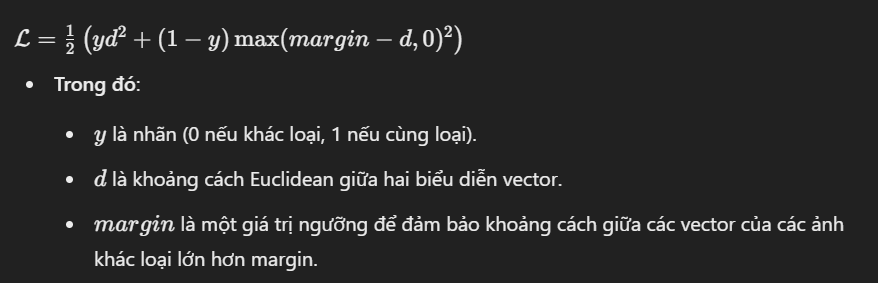

### Quá trình Huấn luyện

1. **Đầu vào**: Một cặp ảnh (A, B) và một nhãn \( y \) (1 nếu cùng loại, 0 nếu khác loại).
2. **Biểu diễn vector**: Cả hai ảnh được đưa qua cùng một mạng chia sẻ trọng số để tạo ra các biểu diễn vector \( f(A) \) và \( f(B) \).
3. **Tính toán khoảng cách**: Tính khoảng cách giữa hai vector \( d = \| f(A) - f(B) \| \).
4. **Tính toán hàm mất mát**: Sử dụng contrastive loss để tính toán hàm mất mát dựa trên khoảng cách \( d \) và nhãn \( y \).
5. **Cập nhật trọng số**: Sử dụng hàm mất mát để cập nhật trọng số của mạng nhằm giảm thiểu mất mát trong các bước huấn luyện tiếp theo.

### Ví dụ về Mạng Siamese với Keras

Dưới đây là một ví dụ đơn giản về cách xây dựng mạng Siamese trong Keras:

```python
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

def build_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    return Model(input, x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

input_shape = (105, 105, 1)
base_network = build_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, output_shape=(1,))([processed_a, processed_b])

model = Model([input_a, input_b], distance)
model.compile(loss=contrastive_loss, optimizer='adam')
```

### Quá trình Sử dụng

1. **Xác thực khuôn mặt (Face Verification)**:
   - Sau khi huấn luyện, mạng Siamese có thể được sử dụng để xác thực xem hai ảnh có phải của cùng một người hay không bằng cách tính toán khoảng cách giữa các biểu diễn vector của hai ảnh. Nếu khoảng cách nhỏ hơn một ngưỡng nhất định, hai ảnh được coi là của cùng một người.

2. **So sánh khuôn mặt mới**:
   - Khi gặp một khuôn mặt mới, mạng Siamese có thể so sánh khuôn mặt này với các khuôn mặt trong cơ sở dữ liệu bằng cách tính toán khoảng cách giữa biểu diễn vector của khuôn mặt mới và các khuôn mặt trong cơ sở dữ liệu. 

### Kết luận

Mạng Siamese hoạt động bằng cách học các biểu diễn vector của các ảnh và sử dụng các biểu diễn này để so sánh và phân loại các ảnh dựa trên khoảng cách giữa các vector. Điều này làm cho mạng Siamese trở nên cực kỳ hiệu quả trong các bài toán xác thực và nhận diện khuôn mặt, đặc biệt là khi dữ liệu huấn luyện hạn chế và cần khả năng tổng quát hóa tốt.